<h3>Methodology</h3>


Fortunately, the dataset was in a CSV format and the first four rows were  was already clean enough that we could process it directly. The only data wrangling that was required was converting the numeric response variable which was the 'Class' column into a categorical one. This was done by changing the integer values 0 and 1 to 'Authentic' and 'Forged' respectively.

*Talk about exploratory analysis*

We then split our dataset into a training and testing dataset, and further divided those into: 
- X_train: A data frame containing the explanatory variables from the training dataset.
- Y_train: A vector containing the class labels from the training dataset. (the values from the ‘class’ column.)
- X_test: A data frame containing the explanatory variables from the testing dataset.
- Y_test: A vector containing the class labels from the testing dataset. (the values from the ‘class’ column.)


Together, X_train and Y_train was used to train our k-nn algorithm. Then *talk about cross-validation, tuning, k accuracy etc*


Then a we will construct a confusion matrix to display our results. 



<div align="center"><h1>Banknote Authentication K-NN Classification Data Science Report</h1></div>


<h3>Introduction</h3>

Counterfeit money is imitation currency produced without the legal permission of the state or government, usually in a conscious attempt to imitate that currency and to deceive its recipient (Counterfeit Prevention). The usage of counterfeit notes is considered to be a fraud and can have adverse side effects on a country's economy. Governments have to come up with may ways of detecting forged banknotes and withdrawing them from preventing them from entering circulation. For this data science project proposal, we will be exploring banknote identification using a dataset from the UCI Machine Learning Repository. The data collected comprises of analysis done on 400x400 pixel gray-scale images taken from genuine and forged banknote-like examples. 

The data set was gathered using an industrial camera, and a wavelet transform tool was used to extract features from the images. A wavelet transform tool is a mathematical function that analyzes essential aspects of an image (noise, intensity, bits/pixel, levels), and these values form a distribution. Just like any distribution, different statistics are used to analyze the shape of the distribution forms. In our case, the statistics used are variance (how dispersed everything is), skewness (how asymmetrical something is), kurtosis (how peaked the distribution is) and entropy (amount of detailed information within an image). The final column is class, which has either a 0 value meaning banknote is authentic or a value of 1, which means that the note is forged.

With this data set, we will be answering the question, can we use data gathered from the digital image analysis of banknotes to predict whether a banknote is forged or authentic?


<h3>Exploratory Data Analysis</h3>

Primarily, we load the relevant packages and then read the dataset, which is in a CSV format, from the repository into Jupyter.

In [1]:
#loading the relevant packages
library(tidyverse)
library(repr)
library(readxl)
library(caret)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



<h4>Table 1.0: Preview of Banknote Authentication Dataset</h4>

In [2]:
# read data into R
b_note_data<-read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", col_names = c("variance", "skewness", "curtosis", "entropy", "class"))

#give a preview of the data
head(b_note_data)

Parsed with column specification:
cols(
  variance = col_double(),
  skewness = col_double(),
  curtosis = col_double(),
  entropy = col_double(),
  class = col_double()
)


variance,skewness,curtosis,entropy,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.62160,8.6661,-2.8073,-0.44699,0
4.54590,8.1674,-2.4586,-1.46210,0
3.86600,-2.6383,1.9242,0.10645,0
3.45660,9.5228,-4.0112,-3.59440,0
0.32924,-4.4552,4.5718,-0.98880,0
4.36840,9.6718,-3.9606,-3.16250,0


The first four columns do not require any modification however since we are predicting a label, which is a categorical value, the 'class' column has to be changed from having numerical values to categorical ones. This is done by changing the integer values 0 and 1 to 'Authentic' and 'Forged' respectively.

<h4>Table 1.1: Dataset after converting the 'class' column</h4>

In [3]:
#change the class column variable from a numerical one to a categorial one.
bnd<-mutate(b_note_data, class = ifelse(class == 0, "Authentic", "Forged"))
head(bnd)


variance,skewness,curtosis,entropy,class
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.62160,8.6661,-2.8073,-0.44699,Authentic
4.54590,8.1674,-2.4586,-1.46210,Authentic
3.86600,-2.6383,1.9242,0.10645,Authentic
3.45660,9.5228,-4.0112,-3.59440,Authentic
0.32924,-4.4552,4.5718,-0.98880,Authentic
4.36840,9.6718,-3.9606,-3.16250,Authentic


<h4>Table 1.2: Number of Observations and Percentage of Forged and Authentic Banknotes <h4>

In [4]:
# Percentage of forged bank notes and authentic bank notes, to check that both are well represented in the dataset.

num_obs <- nrow(bnd)
bnd %>% 
  group_by(class) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100)


class,n,percentage
<chr>,<int>,<dbl>
Authentic,762,55.53936
Forged,610,44.46064


We see that 55.54% are 'Authentic' and 44.46% are 'Forged'. There does not seem to be an underrepresentation (class imbalance) of either class value. 

Now we standardize and randomize the data set to eliminate any bias before splitting it into a training and testing set for the classifier.

In [ ]:
#Randomize data set, standardize it and split it into a 75% / 25% partition (trainig and testing data set)
set.seed(3456) 
bnd_scaled <- bnd%>%
mutate(scaled_variance = scale(variance, center = TRUE),
       scaled_skewness = scale(skewness, center = TRUE),
       scaled_curtosis = scale(curtosis, center = TRUE),
       scaled_entropy = scale(entropy, center = TRUE))


training_rows <- bnd_scaled %>% 
  select(class) %>% 
  unlist() %>% 
  createDataPartition(p = 0.75, list = FALSE)


In [ ]:
#Form the training and testing datasets
training_set<- bnd_scaled %>% slice(training_rows)
testing_set <- bnd_scaled %>% slice(-training_rows)


Now we use the ggpairs() to plot four different predictor variable values against each other to look for trends and find out which one of the predictor variables are relevant for the analysis.



In [ ]:

options(repr.plot.width = 13, repr.plot.height = 7) 

b_note_data3<-select(training_set, variance, skewness, entropy, class)
ggpairs(data=b_note_data3, ggplot2::aes(colour=class, alpha = 0.7), legends = T)
b_note_data3

Looking at these plots, the significant overlap between scatterplots, lack of trends and the weak correlation between the variables indicates that when doing the classification, all four predictor variables should be used because they are of equal importance.


In [8]:
#Pre-process the data
scale_transformer <- preProcess(training_set, method = c("center", "scale")) 
training_set <- predict(scale_transformer, training_set)
test_set <- predict(scale_transformer, testing_set)


#Split the data into predictors and class labels so we can feed it to the classifier.
X_train <- training_set %>% 
  select(variance, skewness, curtosis, entropy) %>% 
  data.frame()
Y_train <- training_set %>% 
  select(class) %>% 
  unlist()
X_test <- test_set %>% 
  select(variance, skewness, curtosis, entropy) %>% 
  data.frame()
Y_test <- test_set %>% 
  select(class) %>% 
  unlist()


In [ ]:
#create a dataframe for different values of k so we can pick the optimal one.
ks <- data.frame(k = c(1,3,5,7,9,11))



In [10]:
#Use folder as 10 to do the cross-validation
set.seed(1234) 
train_control <- trainControl(method = "cv", number = 3)
choose_k <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = ks, trControl = train_control)
choose_k


k-Nearest Neighbors 

1030 samples
   4 predictor
   2 classes: 'Authentic', 'Forged' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 686, 688, 686 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9980563  0.9960670
   3  0.9980563  0.9960670
   5  0.9970874  0.9941063
   7  0.9941804  0.9882396
   9  0.9912677  0.9823562
  11  0.9922367  0.9843092

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

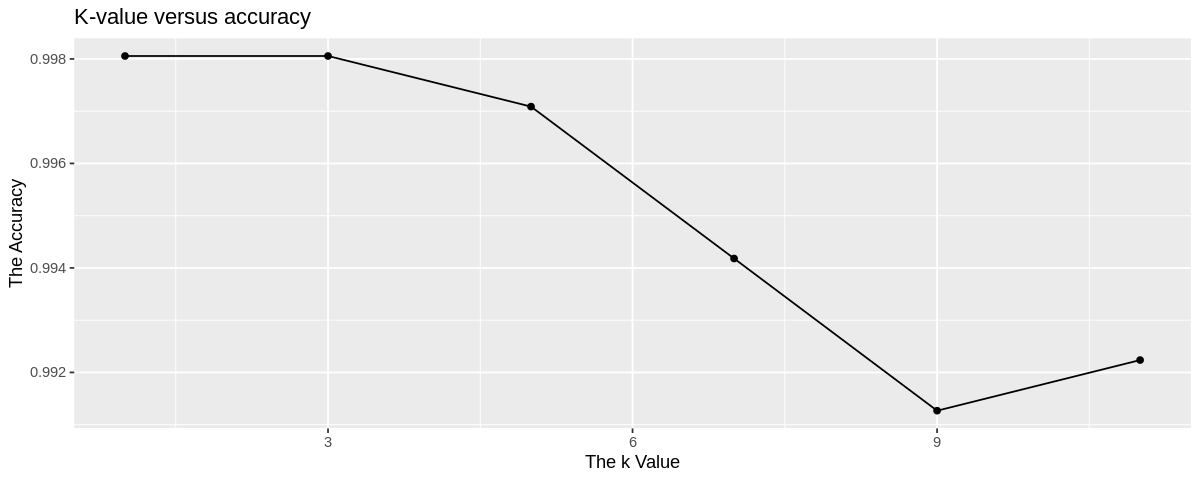

In [11]:
#plot the accuracy of k and then choose the best k
options(repr.plot.width=10, repr.plot.height=4)
k_accuracies <- choose_k$results %>%
                    select(k, Accuracy)
choose_k_plot <- ggplot(k_accuracies, aes(x = k, y = Accuracy)) +
                    geom_point()+
                    geom_line()+
                    labs(x = "The k Value", y = "The Accuracy", title = "K-value versus accuracy")
choose_k_plot


In [12]:
final_k <- data.frame(k = 3)
#Set the optimal value of k according to our graph above.

final_model <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = final_k)
#Train the model using our optimal k value and the training dataset.

final_prediction=predict(final_model, X_test)
#Predict the class labels from the testing dataset.


final_results <- confusionMatrix(table(final_prediction, Y_test))
#compare the predictions to the actual values and visualise it using a confusion matrix.


final_results


Confusion Matrix and Statistics

                Y_test
final_prediction Authentic Forged
       Authentic       189      0
       Forged            1    152
                                          
               Accuracy : 0.9971          
                 95% CI : (0.9838, 0.9999)
    No Information Rate : 0.5556          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9941          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9947          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9935          
             Prevalence : 0.5556          
         Detection Rate : 0.5526          
   Detection Prevalence : 0.5526          
      Balanced Accuracy : 0.9974          
                                          
       'Positive' Class :